<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Lab Series on Network Sciences   
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

## Notebook 3: Nodes Classification with Vanilla Graph Neural Networks
This Jupyter Notebook is designed to help you grasp the most  different aspects of Nodes Classification with Vanilla Graph Neural Networks seen in the lecture.

## Install the required package

In [1]:
%pip install torch_geometric

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --------- ------------------------------ 0.3/1.1 MB ? eta -:--:--
   ------------------ --------------------- 0.5/1.1 MB 1.4 MB/s eta 0:00:01
   --------------------------- ------------ 0.8/1.1 MB 1.0 MB/s eta 0:00:01
   ------------------------------------ --- 1.0/1.1 MB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 932.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## Import the necessary libraries

In [2]:
# Import necessary libraries
from torch_geometric.datasets import Planetoid

## Download the Cora dataset using Planetoid

In [3]:
# Download the Cora dataset using Planetoid
dataset = Planetoid(root=".", name="Cora")


Processing...
Done!


## Access the dataset's data and print basic graph information

In [4]:
# Access the dataset's data
data = dataset[0]

# Print general information about the dataset
print(f'Dataset: {dataset}')
print('---------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of nodes: {data.x.shape[0]}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: Cora()
---------------
Number of graphs: 1
Number of nodes: 2708
Number of features: 1433
Number of classes: 7


## Check for additional properties of the graph

In [5]:
# Check various properties of the graph
print(f'Graph:')
print('------')
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')


Graph:
------
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


## Plotting The Graph using NetworkX
### Convert the PyTorch Geometric data to a NetworkX graph, Exporting to uniform graph format,  and  ploting

In [6]:
from torch_geometric.utils.convert import to_networkx
import networkx as nx

# Convert the PyTorch Geometric data to a NetworkX graph
graph = to_networkx(data, to_undirected=True)

# Export the NetworkX graph to a GraphML file
nx.write_graphml(graph, 'cora_graph.graphml')


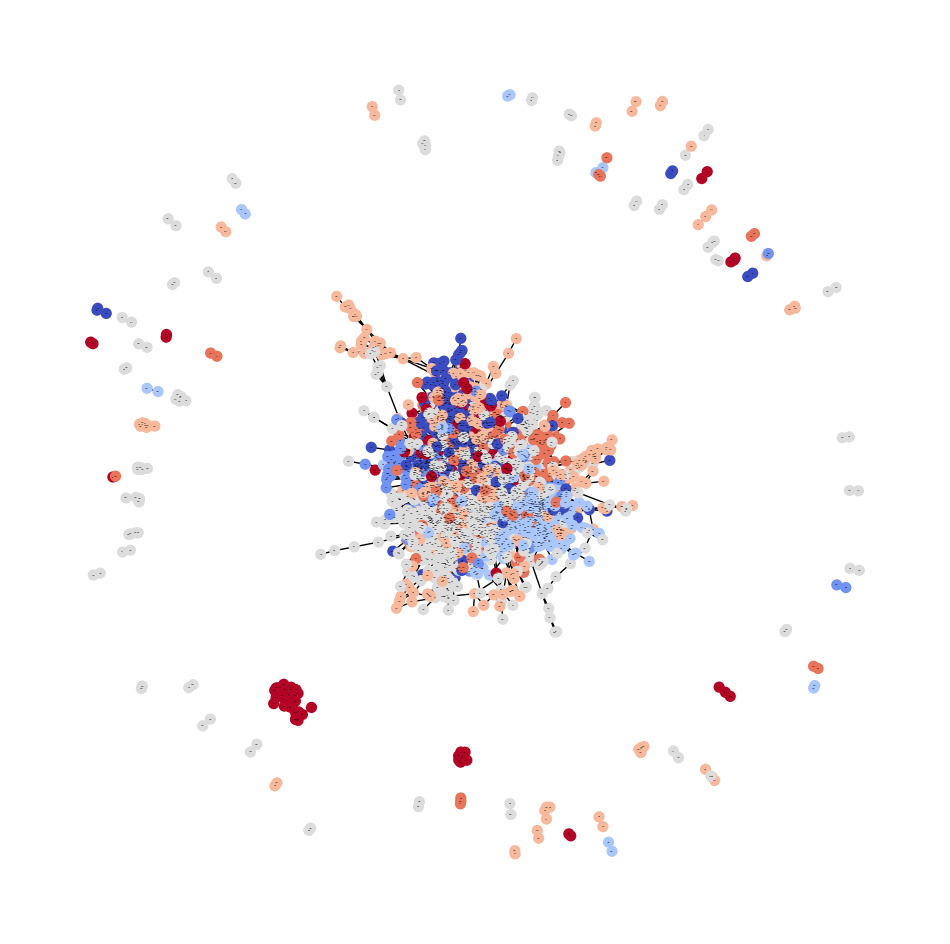

In [7]:
import matplotlib.pyplot as plt
# Define node colors based on labels (you can customize the color map)
node_colors = [data.y[i].item() for i in range(len(data.y))]

# Plot the graph
pos = nx.fruchterman_reingold_layout(graph)
plt.figure(figsize=(12, 12))
plt.axis('off')
nx.draw_networkx(graph, pos, node_color=node_colors, cmap=plt.get_cmap('coolwarm'), node_size=50, font_size=0)
plt.show()


## Node features as a regular tabular dataset

In [8]:
import pandas as pd
df_x = pd.DataFrame(data.x.numpy())
df_x['label'] = pd.DataFrame(data.y)

In [9]:
df_x

,0,1,2,3,4,5,6,7,8,9,...,1424,1425,1426,1427,1428,1429,1430,1431,1432,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2704,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


## Implementing MLP NN model
### MLP Class Implementation

In [10]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid

mlp_train_losses, mlp_val_losses =[], []
mlp_train_accs, mlp_val_accs =[], []
# Define the MLP class
class MLP(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.linear1 = Linear(dim_in, dim_h)
        self.linear2 = Linear(dim_h, dim_out)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)
        return F.log_softmax(x, dim=1)

    def accuracy(self, y_pred, y_true):
        # Calculate the accuracy of predictions
        return torch.sum(y_pred == y_true) / len(y_true)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)

        self.train()
        for epoch in range(epochs + 1):
            optimizer.zero_grad()
            out = self(data.x)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])



            acc = self.accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = self.accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')
                # Append the values
                mlp_train_losses.append(loss.item())
                mlp_val_losses.append(val_loss.item())
                mlp_train_accs.append(acc.item())
                mlp_val_accs.append(val_acc.item())

        return self

    def test(self, data):
        self.eval()
        out = self(data.x)
        acc = self.accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

### Create and Train  the MLP model

In [11]:
# Create  the MLP
mlp = MLP(dataset.num_features, 16, dataset.num_classes)
print(mlp)

MLP(
  (linear1): Linear(in_features=1433, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=7, bias=True)
)


In [12]:
# train the MLP
mlp.fit(data, epochs=100)



Epoch   0 | Train Loss: 1.956 | Train Acc: 15.71% | Val Loss: 1.91 | Val Acc: 15.80%
Epoch  20 | Train Loss: 0.136 | Train Acc: 100.00% | Val Loss: 1.51 | Val Acc: 47.60%
Epoch  40 | Train Loss: 0.017 | Train Acc: 100.00% | Val Loss: 1.64 | Val Acc: 48.80%
Epoch  60 | Train Loss: 0.010 | Train Acc: 100.00% | Val Loss: 1.60 | Val Acc: 48.60%
Epoch  80 | Train Loss: 0.010 | Train Acc: 100.00% | Val Loss: 1.48 | Val Acc: 50.80%
Epoch 100 | Train Loss: 0.010 | Train Acc: 100.00% | Val Loss: 1.44 | Val Acc: 50.80%


MLP(
  (linear1): Linear(in_features=1433, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=7, bias=True)
)

### Test the MLP model and get accuracy

In [13]:
# Test the model and get accuracy
test_acc = mlp.test(data)
print(f'MLP test accuracy: {test_acc*100:.2f}%')

MLP test accuracy: 53.40%


### Visualize the Training and Validation Results

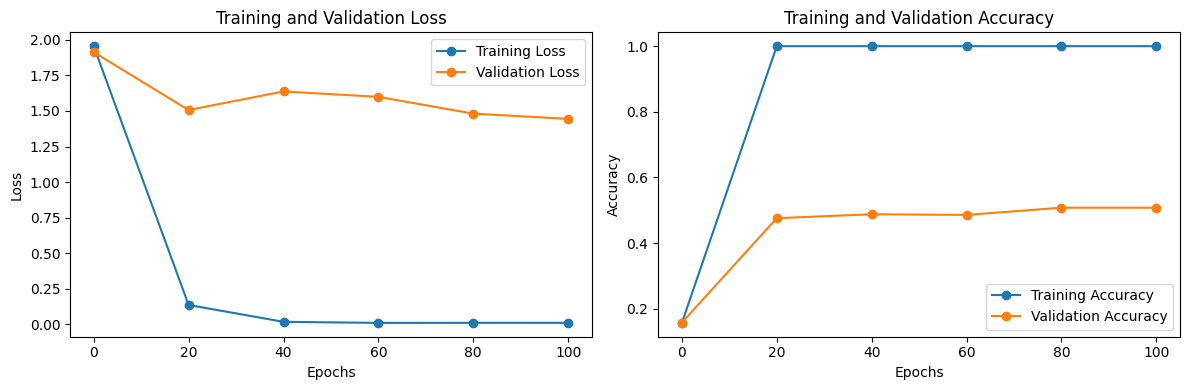

In [14]:
import matplotlib.pyplot as plt

# Assuming you have collected loss and accuracy values during training, let's say in lists 'mlp_train_losses', 'mlp_val_losses', 'mlp_train_accs', and 'mlp_val_accs'.

epochs = range(0, 101, 20)  # Assuming training every 20 epochs

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, mlp_train_losses, label='Training Loss', marker='o')
plt.plot(epochs, mlp_val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, mlp_train_accs, label='Training Accuracy', marker='o')
plt.plot(epochs, mlp_val_accs, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Implementing The Vanilla GNN Model
### Implementing the Vanilla GNN Layer Class

In [15]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Linear
from torch_geometric.utils import to_dense_adj



class VanillaGNNLayer(nn.Module):
    def __init__(self, dim_in, dim_out):
        super(VanillaGNNLayer, self).__init__()
        # Initialize a linear transformation layer without bias
        self.linear = Linear(dim_in, dim_out, bias=False)

    def forward(self, x, adjacency):
        # Apply the linear transformation to the input node features
        x = self.linear(x)
        # Perform a sparse matrix-vector multiplication with the adjacency matrix
        x = torch.sparse.mm(adjacency, x)
        return x


### Declaring the train_losses, val_losses as well as train_accs and val_accs for visualization

In [16]:
gvnn_train_losses, gvnn_val_losses =[], []
gvnn_train_accs, gvnn_val_accs =[], []

### Implementing the Vanilla GNN model Class

In [23]:
class VanillaGNN(nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gnn1 = VanillaGNNLayer(dim_in, dim_h)
        self.gnn2 = VanillaGNNLayer(dim_h, dim_out)

    def forward(self, x, adjacency):
        h = self.gnn1(x, adjacency)
        h = torch.relu(h)
        h = self.gnn2(h, adjacency)
        return F.log_softmax(h, dim=1)

    def accuracy(self, y_pred, y_true):
        # Calculate the accuracy of predictions
        return torch.sum(y_pred == y_true) / len(y_true)

    def fit(self, data, epochs, adjacency):
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)

        self.train()
        for epoch in range(epochs + 1):
            optimizer.zero_grad()
            out = self(data.x, adjacency)
            acc = self.accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            loss.backward()
            optimizer.step()
            
            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = self.accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')
                # Append the values
                gvnn_train_losses.append(loss.item())
                gvnn_val_losses.append(val_loss.item())
                gvnn_train_accs.append(acc.item())
                gvnn_val_accs.append(val_acc.item())

    def test(self, data, adjacency):
        self.eval()
        out = self(data.x, adjacency)
        return self.accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])


### Preparing the Adjacency Matrix used in message passing

In [18]:
adjacency = to_dense_adj(data.edge_index)[0]
adjacency += torch.eye(len(adjacency))
adjacency

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        [0., 1., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 1.],
        [0., 0., 0.,  ..., 0., 1., 1.]])

### Create and Train the Vanilla GNN model

In [24]:
gnn = VanillaGNN(dataset.num_features, 16, dataset.num_classes)
print(gnn)
gnn.fit(data, epochs=100, adjacency=adjacency)
acc = gnn.test(data, adjacency=adjacency)
print(f'\nGNN test accuracy: {acc*100:.2f}%')

VanillaGNN(
  (gnn1): VanillaGNNLayer(
    (linear): Linear(in_features=1433, out_features=16, bias=False)
  )
  (gnn2): VanillaGNNLayer(
    (linear): Linear(in_features=16, out_features=7, bias=False)
  )
)
Epoch   0 | Train Loss: 2.226 | Train Acc:  3.57% | Val Loss: 2.15 | Val Acc: 6.40%
Epoch  20 | Train Loss: 0.062 | Train Acc: 100.00% | Val Loss: 1.55 | Val Acc: 74.00%
Epoch  40 | Train Loss: 0.005 | Train Acc: 100.00% | Val Loss: 2.40 | Val Acc: 73.20%
Epoch  60 | Train Loss: 0.002 | Train Acc: 100.00% | Val Loss: 2.49 | Val Acc: 73.20%
Epoch  80 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 2.43 | Val Acc: 73.00%
Epoch 100 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 2.35 | Val Acc: 72.80%

GNN test accuracy: 74.40%


### Visualize the Training and Validation Results

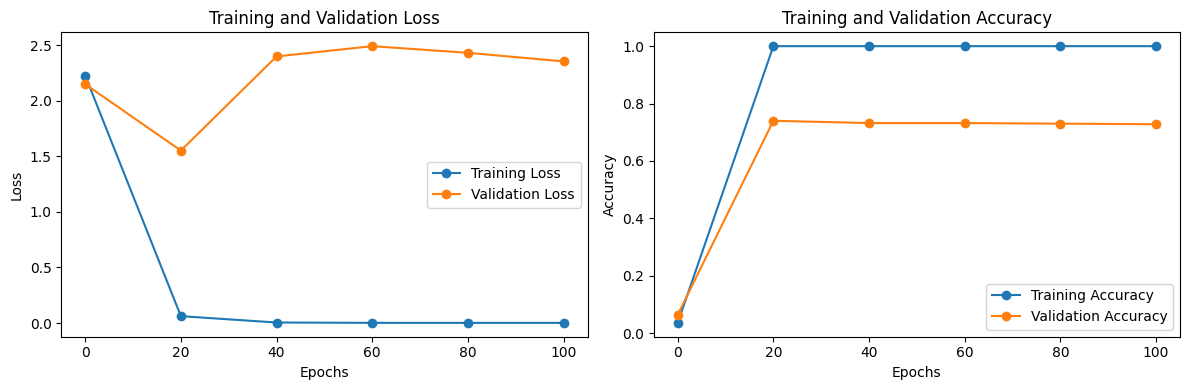

In [25]:
# Assuming you have collected loss and accuracy values during training, let's say in lists 'mlp_train_losses', 'mlp_val_losses', 'mlp_train_accs', and 'mlp_val_accs'.

epochs = range(0, 101, 20)  # Assuming training every 20 epochs

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, gvnn_train_losses, label='Training Loss', marker='o')
plt.plot(epochs, gvnn_val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, gvnn_train_accs, label='Training Accuracy', marker='o')
plt.plot(epochs, gvnn_val_accs, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Models Comparaison
| Dataset Name | MLP (Accuracy) | Vanilla GNN (Accuracy) | Boost (GNN - MLP) |
|--------------|----------------|------------------------|-------------------|
| Cora         | 54.40%         | 77.60%                 | +21.51%           |



## Challenge:

The Facebook Page-Page dataset This dataset was introduced by Rozemberczki et al. in 2019 [2]. In this dataset, each of the 22,470 nodes represents an official Facebook page.
Pages are connected when there are mutual likes between them. Node features (128-dim vectors) are created from textual descriptions written by the owners of these pages. Our goal is to classify each node into one of four categories: politicians, companies, television shows, and governmental organizations.

The Facebook Page-Page dataset is similar to the Cora dataset: it’s a social network with a node classification task. However, there are three major differences with Cora:
-  The number of nodes is much higher (2,708 versus 22,470)
-  The dimensionality of the node features decreased dramatically (from 1,433 to 128)
-  The goal is to classify each node into four categories instead of seven (which is easier since there are fewer options)

Following the previous steps in implementing the MLP and the Vanilla GNN models for the Cora dataset.
- Build 2 models: MLP and VanillaGNN for the Facebook Page-Page dataset
- Compare the two implemented models accuracy results and report how much boost is with the VanillaGNN model in comparaison to the MLP model.

`Hint:`

- Unlike Cora, Facebook Page-Page doesn’t have training, evaluation, and test masks by default. We can arbitrarily create masks with the range() function as follows:
```python
data.train_mask = range(18000)
data.val_mask = range(18001, 20000)
data.test_mask = range(20001, 22470)
```

- To import the FacebookPagePage Dataset you may use the following code:

```python
from torch_geometric.datasets import FacebookPagePage
```
- Then you can download it using this class:
```python
dataset_fsb = FacebookPagePage(root=".")
```

In [27]:
from torch_geometric.datasets import FacebookPagePage

# Load the Facebook Page-Page dataset
dataset_fsb = FacebookPagePage(root=".")
data = dataset_fsb[0]

# Create training, validation, and test masks
data.train_mask = torch.arange(18000)
data.val_mask = torch.arange(18001, 20000)
data.test_mask = torch.arange(20001, 22470)

In [28]:
print(f"Dataset: {dataset_fsb}")
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of features: {data.num_node_features}")
num_classes = len(data.y.unique())
print(f"Number of classes: {num_classes}")

Dataset: FacebookPagePage()
Number of nodes: 22470
Number of features: 128
Number of classes: 4


In [30]:
# Your MLP Solution
mlp = MLP(dim_in=data.num_node_features, dim_h=64, dim_out=num_classes)

# Train the MLP
mlp.fit(data, epochs=100)

# Test the MLP
mlp_acc = mlp.test(data)
print(f"MLP Test Accuracy: {mlp_acc * 100:.2f}%")


Epoch   0 | Train Loss: 1.389 | Train Acc: 31.98% | Val Loss: 1.38 | Val Acc: 31.62%
Epoch  20 | Train Loss: 0.583 | Train Acc: 77.17% | Val Loss: 0.63 | Val Acc: 74.69%
Epoch  40 | Train Loss: 0.516 | Train Acc: 79.81% | Val Loss: 0.60 | Val Acc: 76.04%
Epoch  60 | Train Loss: 0.471 | Train Acc: 81.80% | Val Loss: 0.60 | Val Acc: 76.19%
Epoch  80 | Train Loss: 0.429 | Train Acc: 83.63% | Val Loss: 0.60 | Val Acc: 76.24%
Epoch 100 | Train Loss: 0.395 | Train Acc: 85.02% | Val Loss: 0.62 | Val Acc: 76.64%
MLP Test Accuracy: 75.86%


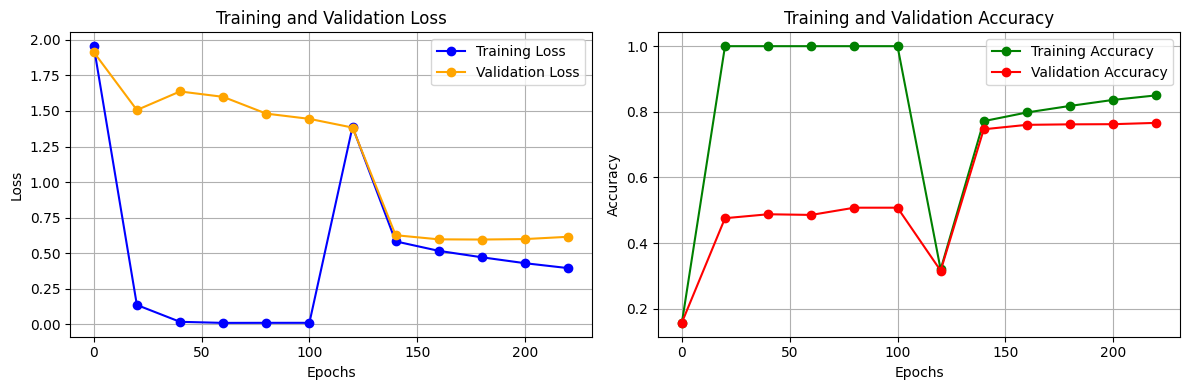

In [33]:
# Adjust epochs to match the number of recorded metrics
epochs = range(0, len(mlp_train_losses) * 20, 20)

# Plot training and validation loss
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(epochs, mlp_train_losses, label='Training Loss', marker='o', color='blue')
plt.plot(epochs, mlp_val_losses, label='Validation Loss', marker='o', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, mlp_train_accs, label='Training Accuracy', marker='o', color='green')
plt.plot(epochs, mlp_val_accs, label='Validation Accuracy', marker='o', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [34]:
# Your Vanilla GNN Solution
gvnn_train_losses, gvnn_val_losses =[], []
gvnn_train_accs, gvnn_val_accs =[], []

In [35]:
# Create adjacency matrix with self-loops
adjacency = torch.eye(data.num_nodes)
edge_index = data.edge_index
adjacency[edge_index[0], edge_index[1]] = 1

# Define the VanillaGNN model
gnn = VanillaGNN(dim_in=data.num_node_features, dim_h=64, dim_out=num_classes)

# Train the Vanilla GNN
gnn.fit(data, epochs=100, adjacency=adjacency)

# Test the Vanilla GNN
gnn_acc = gnn.test(data, adjacency=adjacency)
print(f"Vanilla GNN Test Accuracy: {gnn_acc * 100:.2f}%")


Epoch   0 | Train Loss: 93.919 | Train Acc: 19.86% | Val Loss: 88.80 | Val Acc: 19.66%
Epoch  20 | Train Loss: 21.465 | Train Acc: 80.42% | Val Loss: 13.89 | Val Acc: 80.84%
Epoch  40 | Train Loss: 4.389 | Train Acc: 82.87% | Val Loss: 3.94 | Val Acc: 83.54%
Epoch  60 | Train Loss: 1.985 | Train Acc: 86.05% | Val Loss: 1.85 | Val Acc: 86.34%
Epoch  80 | Train Loss: 4.551 | Train Acc: 85.89% | Val Loss: 2.97 | Val Acc: 84.29%
Epoch 100 | Train Loss: 2.768 | Train Acc: 84.92% | Val Loss: 1.88 | Val Acc: 84.44%
Vanilla GNN Test Accuracy: 84.53%


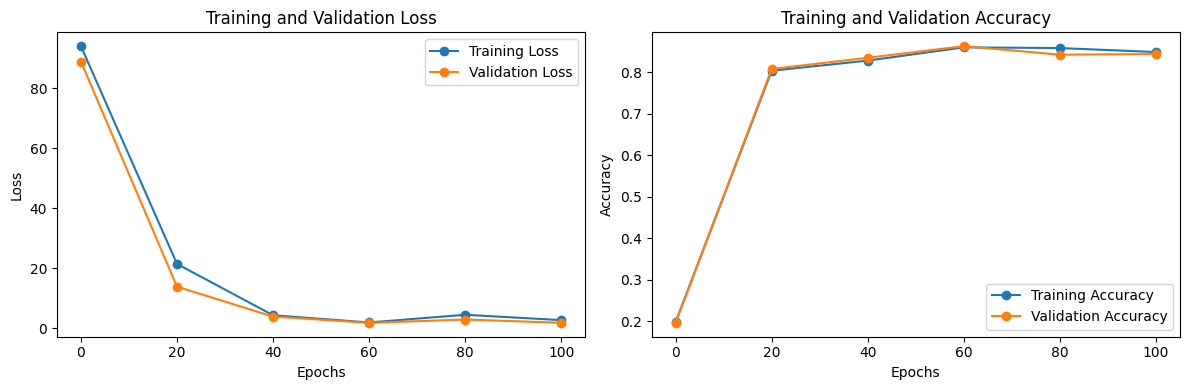

In [36]:

epochs = range(0, 101, 20)  # Assuming training every 20 epochs

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, gvnn_train_losses, label='Training Loss', marker='o')
plt.plot(epochs, gvnn_val_losses, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, gvnn_train_accs, label='Training Accuracy', marker='o')
plt.plot(epochs, gvnn_val_accs, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()